In [5]:
!pip install tslearn

  Running setup.py bdist_wheel for tslearn: started
  Running setup.py bdist_wheel for tslearn: finished with status 'error'
  Complete output from command C:\Users\ksher\AppData\Local\Continuum\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\ksher\\AppData\\Local\\Temp\\pip-install-1zjwf65t\\tslearn\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\ksher\AppData\Local\Temp\pip-wheel-lkta7a4j --python-tag cp37:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\tslearn
  copying tslearn\barycenters.py -> build\lib.win-amd64-3.7\tslearn
  copying tslearn\clustering.py -> build\lib.win-amd64-3.7\tslearn
  copying tslearn\datasets.py -> build\lib.win-amd64-3.7\tslearn
  copying tslearn\generators.py -> build\lib.win-amd64-3.7\tslearn
  copying tslearn\metri

  Failed building wheel for tslearn
Command "C:\Users\ksher\AppData\Local\Continuum\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\ksher\\AppData\\Local\\Temp\\pip-install-1zjwf65t\\tslearn\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\ksher\AppData\Local\Temp\pip-record-nzzuzz05\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\ksher\AppData\Local\Temp\pip-install-1zjwf65t\tslearn\


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

#### Calucate correlations between the time series in the pre-period.

1. Pearson Correlation

In [32]:
df = pd.read_csv('../data/comp_price.csv')
df = df.drop('date.1', axis =1)
df = df.drop('date', axis =1)

# df.iloc[:131]

In [26]:
# df.iloc[:141]

date                  2018-01-14
Portland_avg_price       65.9312
SF_avg_price             135.464
Name: 141, dtype: object

In [37]:
def pearson_corr(idx,dt):

    pre_df = df.iloc[:idx]
    overall_pearson_r = pre_df.corr().iloc[0,1]
    print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")


    r, p = stats.pearsonr(pre_df.dropna()['Portland_avg_price'], pre_df.dropna()['SF_avg_price'])
    print(f"Scipy computed Pearson r: {r} and p-value: {p}")


    # Compute rolling window synchrony
    f,ax=plt.subplots(figsize=(7,3))
    df.rolling(window=30,center=True).median().plot(ax=ax)
    ax.set(xlabel='Time',ylabel='Pearson r')
    ax.set(title=f"Overall Pearson Up to {dt} r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r up to 2017-10-29: 0.689303909073568
Scipy computed Pearson r: 0.6893039090735681 and p-value: 4.517683536973997e-19


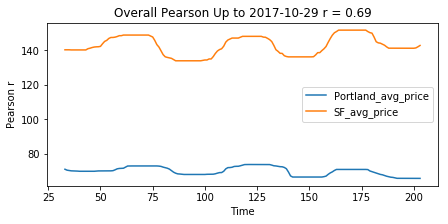

In [38]:
pearson_corr(131,'2017-10-29')

Pandas computed Pearson r up to 2018-01-14: 0.6750300861223838
Scipy computed Pearson r: 0.6750300861223839 and p-value: 2.030135441463852e-19


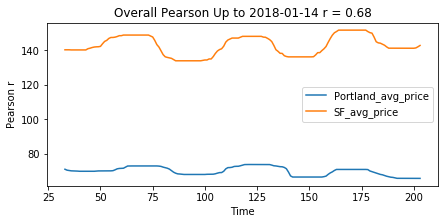

In [40]:
pearson_corr(141,'2018-01-14')

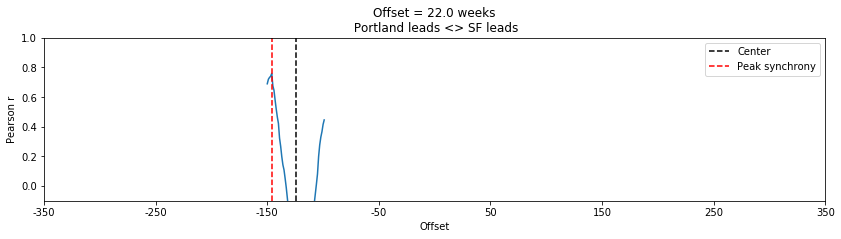

In [81]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    
    
    
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

pre_df = df[:131]
d1 = pre_df['Portland_avg_price']
d2 = pre_df['SF_avg_price']



rs = [crosscorr(d1,d2, lag) for lag in range(52)]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} weeks\n Portland leads <> SF leads',ylim=[-.1,1],xlim=[-200,500], xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()])
plt.legend()

In [96]:
# https://dtaidistance.readthedocs.io/en/latest/usage/dtw.html

s1 = np.asarray(pre_df['SF_avg_price'])

s2 = np.asarray(pre_df['Portland_avg_price'])

d = dtw.distance_fast(s1, s2)

ModuleNotFoundError: No module named 'dtaidistance'